In [2]:
!python -m pip install -U plotly

In [3]:
!python -m pip install -U gensim

Requirement already up-to-date: gensim in d:\anaconda\lib\site-packages (4.1.2)


In [5]:
!python -m pip install -U kneed

In [7]:
import pandas as pd

import numpy as np 

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt 

#!pip install kneed
from kneed import KneeLocator

from sklearn.cluster import KMeans 
from scipy.cluster import hierarchy 
from sklearn.cluster import AgglomerativeClustering 

from gensim.models.doc2vec import Doc2Vec

>### <span style="color:#AF33FF">'a'   :   'THE COMMON LAW.txt'</span>

>### <span style="color:#FF5533">'b'   :   'THE CONSTITUTION OF THE UNITED STATES OF AMERICA.txt'</span>

>### <span style="color:#3BE53C">'c'   :   'THE-ENGLISH-CONSTITUTION.txt'</span>

>### <span style="color:#E53BD5">'d'   :   'THE-LIFE-OF-THE-BEE.txt'</span>

>### <span style="color:#E5C33B">'e'   :   'THE STANDARD ELECTRICAL DICTIONARY.txt'</span>

>### <span style="color:#3BE3E5">'f'   :   'THE-PHILOSOPHY-OF-MATHEMATICS.txt'</span>

>### <span style="color:#FF5BC8">'g'   :   'WHITE-HOUSE-COOK-BOOK.txt</span>

In [8]:
url='https://drive.google.com/file/d/1IBelm4cZNHpl8336gQ6VTIYzZrtC02ln/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_out = pd.read_csv(url)

df_out.drop('Unnamed: 0', axis=1, inplace=True)
df_out

,segment,label
0,act known circumst harm may accept gener test ...,a
1,aris whether represent part contract If contra...,a
2,section cite godbolt see F. N. B G fitzh abr d...,a
3,row bell c.c see treasur hidden anoth land D. ...,a
4,give trespass pretti nearli thing action case ...,a
...,...,...
1395,lamb chop fri tomato potato la crãªme rais bis...,g
1396,glass rhine wine IV glass water V glass champa...,g
1397,cover cloth set away cool place hour dinner ti...,g
1398,transpar veil egg cook white firm lift griddl ...,g


In [7]:
# Create CountVectorizer object
vectorizer = CountVectorizer()
# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(df_out['segment'])
print(bow_matrix.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
df_bow = pd.DataFrame(bow_matrix.toarray())
df_bow.columns = vectorizer.get_feature_names_out()
df_bow

,101,127,447,511,576,580,606,75,851,945,aa,aaron,ab,abandon,abat,abb,abbr,abbrevi,abbreviatio,abdic,abdomen,abduct,abeil,abel,aber,aberr,abey,abhor,abi,abigail,abil,abilen,abject,abl,ableman,ablest,abli,abneg,abnorm,abod,...,yolk,yonder,york,yorkshir,yorktown,you,young,younger,youngest,your,youth,ypsilanti,yuginovich,zamboni,zant,zeal,zealand,zealot,zealou,zeiss,zeitung,zenith,zero,zest,zigzag,zimmerman,zinc,zincod,zn,zn2,zoet,zonara,zone,zucht,zur,½aumur,½cker,½llner,½r,½rian
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1396,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
## Repeat the BOW step for Tfidf

# Create TfidfVectorizer object
vectorizer2 = TfidfVectorizer()
# Generate matrix of word vectors
tfidf_matrix = vectorizer2.fit_transform(df_out['segment'])

df_tfidf = pd.DataFrame(tfidf_matrix.toarray())
df_tfidf.columns = vectorizer2.get_feature_names_out()
df_tfidf

,101,127,447,511,576,580,606,75,851,945,aa,aaron,ab,abandon,abat,abb,abbr,abbrevi,abbreviatio,abdic,abdomen,abduct,abeil,abel,aber,aberr,abey,abhor,abi,abigail,abil,abilen,abject,abl,ableman,ablest,abli,abneg,abnorm,abod,...,yolk,yonder,york,yorkshir,yorktown,you,young,younger,youngest,your,youth,ypsilanti,yuginovich,zamboni,zant,zeal,zealand,zealot,zealou,zeiss,zeitung,zenith,zero,zest,zigzag,zimmerman,zinc,zincod,zn,zn2,zoet,zonara,zone,zucht,zur,½aumur,½cker,½llner,½r,½rian
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.066193,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Load the pretrained Doc2Vec transformer
d2v_model = Doc2Vec.load('./Doc2Vec_model/doc2vec.model')
d2v_model_high = Doc2Vec.load('./Doc2Vec_model/doc2vec_high.model')
d2v_model_low = Doc2Vec.load('./Doc2Vec_model/doc2vec_low.model')

In [19]:
#generate the list of tokenized words
text_list = df_out['segment'].values.tolist()

tokenized_list = []
for segment in text_list:
    tokenized_segment = segment.split()
    tokenized_list.append(tokenized_segment)
    


In [23]:
#generate the list of word vectors
x_d2v = []
for d in tokenized_list:
    x_d2v.append(d2v_model.infer_vector(d))
        
x_d2v

[array([ 0.05599802, -0.05990855,  0.02908932, ..., -0.02872658,
         0.01550854,  0.00073871], dtype=float32),
 array([ 0.0333707 , -0.03560353,  0.0288431 , ..., -0.00860044,
         0.02881516,  0.01114604], dtype=float32),
 array([-0.00643286, -0.04043752,  0.05789019, ..., -0.00688458,
         0.01135416,  0.01724   ], dtype=float32),
 array([ 0.00577256, -0.04351053,  0.05764686, ..., -0.02341133,
         0.01037966,  0.0202562 ], dtype=float32),
 array([ 0.02321394, -0.01821474,  0.00456537, ..., -0.01393482,
         0.0103881 ,  0.00301066], dtype=float32),
 array([ 0.02650583, -0.03882876,  0.03912159, ..., -0.0281584 ,
         0.01966825,  0.01234832], dtype=float32),
 array([ 0.0506463 , -0.03009552,  0.01028314, ..., -0.01987626,
         0.01976096, -0.00030414], dtype=float32),
 array([ 0.05113066, -0.04439797,  0.02384192, ..., -0.02683561,
         0.01828581, -0.00410959], dtype=float32),
 array([ 0.00490613, -0.030466  ,  0.03538142, ..., -0.00104075,
       

In [24]:
x_d2v_high = []
for d in tokenized_list:
    x_d2v_high.append(d2v_model_high.infer_vector(d))
        
x_d2v_high

[array([-0.00019964, -0.05397522,  0.05038356, ..., -0.00417817,
         0.02953526,  0.03464479], dtype=float32),
 array([-0.03665181, -0.00934292,  0.02370486, ...,  0.02764797,
         0.03119426,  0.0206041 ], dtype=float32),
 array([-0.05405866,  0.0280873 ,  0.00358519, ...,  0.03725278,
         0.01347195, -0.0022751 ], dtype=float32),
 array([-0.03849073, -0.01229609,  0.02091662, ...,  0.02088724,
         0.01471022,  0.01573282], dtype=float32),
 array([-0.02269244, -0.00647092,  0.0002301 , ...,  0.00567363,
         0.00657311,  0.01206505], dtype=float32),
 array([-0.03772637, -0.01756065,  0.02353296, ...,  0.00758652,
         0.02399991,  0.0245623 ], dtype=float32),
 array([ 0.014512  , -0.03692255,  0.03122825, ..., -0.02658444,
         0.02090986,  0.03863224], dtype=float32),
 array([ 0.02282974, -0.07204258,  0.06147825, ..., -0.01758919,
         0.01541992,  0.02293682], dtype=float32),
 array([-0.06098861,  0.04453785, -0.00853778, ...,  0.06587805,
       

In [25]:
x_d2v_low = []
for d in tokenized_list:
    x_d2v_low.append(d2v_model_low.infer_vector(d))
        
x_d2v_low

[array([ 0.0741042 , -0.04394346,  0.00702391, ..., -0.03396801,
         0.03041548,  0.0478884 ], dtype=float32),
 array([ 0.06350167, -0.03189121, -0.00291382, ..., -0.02001852,
         0.02848419,  0.04251867], dtype=float32),
 array([ 0.06189726, -0.05945362,  0.04280587, ..., -0.03685002,
         0.0277752 ,  0.05836783], dtype=float32),
 array([ 0.06232268, -0.04117625,  0.01720437, ..., -0.03169856,
         0.02854457,  0.05003016], dtype=float32),
 array([ 0.08247697, -0.04522348,  0.00715056, ..., -0.04475708,
         0.03583924,  0.05311185], dtype=float32),
 array([ 0.0632899 , -0.03205301,  0.00388489, ..., -0.02808223,
         0.03185594,  0.05154819], dtype=float32),
 array([ 0.0832043 , -0.03897008, -0.00498753, ..., -0.03450135,
         0.03709674,  0.05337672], dtype=float32),
 array([ 0.06300574, -0.04274599,  0.01269298, ..., -0.03582112,
         0.02302057,  0.03836041], dtype=float32),
 array([ 0.06216918, -0.0325601 ,  0.00429599, ..., -0.02556035,
       

In [15]:
def make_SVDtsne_2d(df, label=None, books=('a','b','c','d','e','f','g')):
  reduced = TruncatedSVD(n_components=7, random_state=0).fit_transform(df)

  tsne_results = TSNE(n_components=2, 
                      perplexity=40, 
                      init='pca', # globally more stable to initialization
                      learning_rate = 'auto',
                      n_iter=1000, 
                      random_state=0).fit_transform(reduced)

  df = pd.DataFrame()
  df['tsne-2d-one'] = tsne_results[:,0]
  df['tsne-2d-two'] = tsne_results[:,1]
  df['label_True'] = df_out['label'].loc[df_out['label'].isin(books)].reset_index(drop=True)
  print(df)
  if label is not None:
    dic = dict(enumerate(df_out['label'].loc[df_out['label'].isin(books)].unique()))
    lbl = list(label)
    for i, l in zip(range(0,len(lbl)), lbl):
      try:
        lbl[i] = dic[l].upper()
      except:
        lbl[i] = 'Outlier'
    df['label_Pred'] = lbl
  
  print(df)
  if label is None: fig = px.scatter(df, x='tsne-2d-one', y='tsne-2d-two', color="label_True", symbol="label_True", width=1200, height=900)
  if label is not None: fig = px.scatter(df, x='tsne-2d-one', y='tsne-2d-two', color="label_Pred", symbol="label_True", width=1200, height=900)

  fig.show()

In [69]:
def make_tsne_2d(df, label=None, books=('a','b','c','d','e','f','g')):
    # need to read raw our.csv first
    # df must be vectorized DataFrame
    
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000, random_state=0)
    tsne_results = tsne.fit_transform(df)
    
    df = pd.DataFrame()
    df['tsne-2d-one'] = tsne_results[:,0]
    df['tsne-2d-two'] = tsne_results[:,1]
    df['label_True'] = df_out['label'].loc[df_out['label'].isin(books)].reset_index(drop=True)
    if label is not None:
      dic = dict(enumerate(df_out['label'].unique()))
      lbl = list(label)
      for i, l in zip(range(0,len(lbl)), lbl):
        try:
          lbl[i] = dic[l].upper()
        except:
          lbl[i] = 'Outlier'
      df['label_Pred'] = lbl
    
    if label is None: fig = px.scatter(df, x='tsne-2d-one', y='tsne-2d-two', color="label_True", symbol="label_True", width=1200, height=900)
    if label is not None: fig = px.scatter(df, x='tsne-2d-one', y='tsne-2d-two', color="label_Pred", symbol="label_True", width=1200, height=900)
    fig.show()

In [13]:
def elbow_method(data, number):
    wcss = []
    for i in range(1, number+1):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    kn = KneeLocator(range(1, 10+1), wcss, curve='convex', direction='decreasing')

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(1, number+1)),
                            y=wcss))
    fig.add_vline(x=kn.knee, line_width=3, line_dash="dash", line_color="green")

    fig.update_layout(title='Elbow Method',
                      xaxis_title='Number of clusters',
                      yaxis_title='WCSS',
                      title_x=0.5,
                      height=500, 
                      width=800)
    fig.show()

In [ ]:
elbow_method(df_bow, 10)

In [ ]:
elbow_method(df_tfidf, 10)

In [ ]:
# Transformers = [Bow, Tfidf]

In [ ]:
# Models = [KMeans, AgglomerativeClustering, GaussianMixture]

In [31]:
def compare_predict(trans, modl, vidl, n_clusters=5, linkage='average', books=('a','b','c','d','e','f','g')):
  if trans == 'bow':
    X = df_bow
  if trans == 'tfidf':
    X = df_tfidf

  X = X[df_out['label'].isin(books)]

  if modl == 'KMeans':
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
  if modl == 'AgglomerativeClustering':
    agglom = AgglomerativeClustering(n_clusters =n_clusters, linkage =linkage)
    agglom.fit(X)
    labels = agglom.labels_

  if vidl == 'tsne':
    make_tsne_2d(X, labels, books)
  if vidl == 'SVDtsne':
    make_SVDtsne_2d(X, labels, books)

In [78]:
# Transformers = [Bow, Tfidf]
# Models = [KMeans, AgglomerativeClustering, GaussianMixture]
# vidl = [SVDtsne, tsne]

compare_predict('tfidf', 'KMeans', 'SVDtsne', n_clusters=5, linkage='average', books=('c','d','e','f','g'))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



     tsne-2d-one  tsne-2d-two label_True
0     -16.322504     2.972853          c
1     -19.820822     4.611575          c
2     -31.059439     7.139798          c
3     -27.803078     7.712056          c
4     -24.675926     7.253334          c
..           ...          ...        ...
995    33.165379     5.975839          g
996    28.596718     8.056506          g
997    37.134983   -13.858617          g
998    36.190510    -9.154833          g
999    33.602234     5.347060          g

[1000 rows x 3 columns]
     tsne-2d-one  tsne-2d-two label_True label_Pred
0     -16.322504     2.972853          c          E
1     -19.820822     4.611575          c          E
2     -31.059439     7.139798          c          E
3     -27.803078     7.712056          c          E
4     -24.675926     7.253334          c          E
..           ...          ...        ...        ...
995    33.165379     5.975839          g          C
996    28.596718     8.056506          g          C
997    37.13498

In [ ]:
agglom = AgglomerativeClustering(n_clusters = 5, linkage = 'average')

In [ ]:
X = df_bow

agglom.fit(X)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [ ]:
make_tsne_2d(df_bow)
make_tsne_2d(df_bow, agglom.labels_)

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [ ]:
X = df_bow

kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [ ]:
kmeans7 = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [ ]:
X = df_bow

kmeans7.fit(X)

KMeans(n_clusters=7, random_state=0)

In [ ]:
kmeans.labels_

array([3, 3, 3, ..., 4, 4, 4], dtype=int32)

In [ ]:
make_tsne_2d(df_bow)
make_tsne_2d(df_bow, kmeans.labels_)
make_tsne_2d(df_bow, kmeans7.labels_)

In [ ]:
make_SVDtsne_2d(df_bow)
make_SVDtsne_2d(df_bow, kmeans.labels_)
make_SVDtsne_2d(df_bow, kmeans7.labels_)

In [ ]:
kmeans5 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [ ]:
X = df_tfidf

kmeans5.fit(X)

KMeans(n_clusters=5, random_state=0)

In [ ]:
kmeans7 = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [ ]:
X = df_tfidf

kmeans7.fit(X)

KMeans(n_clusters=7, random_state=0)

In [ ]:
kmeans.labels_

array([3, 3, 3, ..., 4, 4, 4], dtype=int32)

In [ ]:
make_tsne_2d(df_tfidf)
make_tsne_2d(df_tfidf, kmeans.labels_)
make_tsne_2d(df_tfidf, kmeans7.labels_)

In [ ]:
make_SVDtsne_2d(df_tfidf)
make_SVDtsne_2d(df_tfidf, kmeans.labels_)
make_SVDtsne_2d(df_tfidf, kmeans7.labels_)

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gmm5 = GaussianMixture(n_components=5, random_state=0)

In [ ]:
X = df_tfidf

gmm5.fit(X)

In [ ]:
gmm7 = GaussianMixture(n_components=7, random_state=0)

In [ ]:
X = df_tfidf

gmm7.fit(X)

KMeans(n_clusters=7, random_state=0)

In [ ]:
gmm5.labels_

array([3, 3, 3, ..., 4, 4, 4], dtype=int32)

In [ ]:
help(DBSCAN)

In [ ]:
from sklearn.cluster import DBSCAN 

In [ ]:
db = DBSCAN(eps=1.3, min_samples=8)

In [ ]:
X = df_tfidf

db.fit(X)

DBSCAN(eps=1.3, min_samples=8)

In [ ]:
set(db.labels_)

{-1, 0}

In [ ]:
db = DBSCAN(eps=5.7, min_samples=15)

In [ ]:
X = df[['tsne-2d-one','tsne-2d-two']]

db.fit(X)

DBSCAN(eps=5.7, min_samples=15)

In [ ]:
set(db.labels_)

{-1, 0, 1, 2, 3, 4, 5}

In [ ]:
make_tsne_2dv(df_tfidf)
make_tsne_2dv(df_tfidf, db.labels_)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1400 samples in 0.024s...
[t-SNE] Computed neighbors for 1400 samples in 1.878s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1400
[t-SNE] Computed conditional probabilities for sample 1400 / 1400
[t-SNE] Mean sigma: 0.289257
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.109413
[t-SNE] KL divergence after 1000 iterations: 0.831380


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1400 samples in 0.014s...
[t-SNE] Computed neighbors for 1400 samples in 0.964s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1400
[t-SNE] Computed conditional probabilities for sample 1400 / 1400
[t-SNE] Mean sigma: 0.289257
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.109413
[t-SNE] KL divergence after 1000 iterations: 0.831380


In [ ]:
help(AgglomerativeClustering)

In [ ]:
agglom = AgglomerativeClustering(n_clusters = 7, linkage = 'average')

In [ ]:
agglom.fit(df_tfidf)

AgglomerativeClustering(linkage='average', n_clusters=7)

In [ ]:
from scipy.spatial import distance_matrix 

In [ ]:
dist_matrix = distance_matrix(df_tfidf,df_tfidf) 

In [ ]:
Z = hierarchy.linkage(dist_matrix, 'complete')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



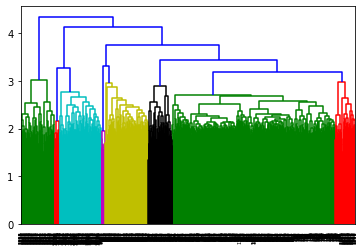

In [ ]:
dendro = hierarchy.dendrogram(Z)

In [ ]:
fig = ff.create_dendrogram(df_tfidf)

fig.update_layout(height=900, width=2200)
fig.show()

KeyboardInterrupt: ignored